Jonathan Christopher Gani  
2702223084

# Customer Segmentation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score as r2
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier, XGBRegressor

In [ ]:
# read file train
data1 = pd.read_csv('Train.csv')
data1.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [ ]:
# read file test
data2 = pd.read_csv('Test.csv')
data2.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A


In [ ]:
# merging 2 datasets using concat functions
dataset = pd.concat([data1, data2], axis=0)
dataset

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,B
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,A
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6,C
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,C


## 2. Customer Segmentation Dataset Source :
https://www.kaggle.com/datasets/kaushiksuresh147/customer-segmentation?select=Train.csv  
As we can see, there are 11 attributes in total in this dataset. With 'ID' as ID column. And Segmentation as the predicted label. This dataset consist of 10695 rows, which is pretty enough to do the modelling process.

## Dataset Explanation :
1. ID (ID datatype) : it tells us about each customer unique id
2. Gender (nominal datatype) : each customeR gender
3. Ever_Married (nominal datatype) : showing the marital status of each customer (yes / no)  
4. Age (continous datatype) : customer's age
5. Graduated (nominal datatype) : each customer graduation status (yes / no)
6. Profession (nominal datatype) : profession of each customer
7. Work_Experience (discrete datatype) : it tells about each customer working experience in years
8. Spending_Score (ordinal datatype) : it tells us about each customer's spending range (Low / Average / High)
9. Family_Size (discrete datatype) : each customer's number of family
10. Var_1 (nominal datatype) : it tells us about anonymised category for each customer   
11. Segmentation (nominal datatype) : the segmentation of each customer  (A / B / C / D)

basically this dataset is predicting wether each customer segmentation is considered as segment A, B, C, or  D based on the given features (the rest of the attributes execpt 'Segmentation'). Therefore the y or the predicted label is Segmentation, and the rest is gonna be the 'x' or features.  
  
This customer segmentation prediction is important, because the company needs to understand each customer difference and characteristics, therefore they could make and offer the best deal to each customer.


## Dataset Information

In [ ]:
dataset.info() # this .info() function, tells us each columns of the dataset with their own data types, such as int, float, and object

<class 'pandas.core.frame.DataFrame'>
Index: 10695 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
 10  Segmentation     10695 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 1002.7+ KB


In [ ]:
dataset.describe() # showing the statistical summary of numerical attributes / columns only, therefore, the non numerical data will not be shown

,ID,Age,Work_Experience,Family_Size
count,10695.000000,10695.000000,9597.000000,10247.000000
mean,463468.088640,43.511828,2.619777,2.844052
std,2600.966411,16.774158,3.390790,1.536427
min,458982.000000,18.000000,0.000000,1.000000
25%,461220.500000,30.000000,0.000000,2.000000
50%,463451.000000,41.000000,1.000000,3.000000
75%,465733.500000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


## Remove Identifier Column


In [ ]:
# beacuse we will not use this attribute for predicting the labels, therefore we remove this feature from the beginning
dataset.drop(columns=['ID'], inplace=True)
dataset.head()
# dropping the column first because if i didn't drop it, then there will no duplication detected, because the 'ID' column which consist all unique values, which might leads the model became bias
# but if i drop the 'ID' column first, then all the existing duplication will be detected.

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


## Duplicated Value

In [ ]:
# check total duplicate value
dataset.duplicated().sum() # as we can see, there are plenty of duplicated values here which are 629 values

629

In [ ]:
# drop all the duplicated values
dataset = dataset.drop_duplicates().reset_index(drop=True) # as we know, after deleting the duplicated data, there must be some missing rows, therefore we must reset the index, so the order between rows is sequential

In [ ]:
dataset.duplicated().sum() # now there are no more duplicated values

0

In [ ]:
dataset # as we can see the dataset row is shrinking by 629 rows which shown below 10066 rows left

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...
10061,Female,No,35,Yes,Entertainment,1.0,Low,2.0,Cat_6,D
10062,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,B
10063,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,A
10064,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6,C


## Missing Value

In [ ]:
# check missing values
dataset.isna().sum() # as we can see, there are plenty of missing values in this dataset

,0
Gender,0
Ever_Married,189
Age,0
Graduated,100
Profession,162
Work_Experience,1053
Spending_Score,0
Family_Size,443
Var_1,108
Segmentation,0


In [ ]:
# based on the summary of the missing values above , there are 2 options which are drop all the na or doing imputation
# here i decided to drop all of them instead of doing imputation, because in my opinion, if i did the imputation, therefore the data is not real which might leads the model become bias
dataset = dataset.dropna().reset_index(drop=True) # dropping all the rows consisting NaN

In [ ]:
dataset.isna().sum() # now there are no more missing values

,0
Gender,0
Ever_Married,0
Age,0
Graduated,0
Profession,0
Work_Experience,0
Spending_Score,0
Family_Size,0
Var_1,0
Segmentation,0


In [ ]:
dataset # the number of rows of the dataset is shrinking pretty much, but it still enough to build the model

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
2,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
3,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
4,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
...,...,...,...,...,...,...,...,...,...,...
8237,Female,No,19,No,Healthcare,0.0,Low,3.0,Cat_6,A
8238,Female,No,35,Yes,Entertainment,1.0,Low,2.0,Cat_6,D
8239,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,B
8240,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,A


## Split Into Numerical And Categorical Data

In [ ]:
num_cols = []  # making list for numerical data
cat_cols = []  # making list for categorical data

for i in dataset.columns:
    if 'int' in str(dataset[i].dtype) or 'float' in str(dataset[i].dtype):
        num_cols.append(i) # each attribute with int / float dtypes assigned to the num_cols list
    else:
        cat_cols.append(i) # the rest of non numeric attribute which is the categoricals

print(f"Categorical Cols : {cat_cols}")
print(f"Numeric Cols : {num_cols}")

# as we can see the results of each data types is already appropriate

Categorical Cols : ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1', 'Segmentation']
Numeric Cols : ['Age', 'Work_Experience', 'Family_Size']


## Check Distributions and Outliers

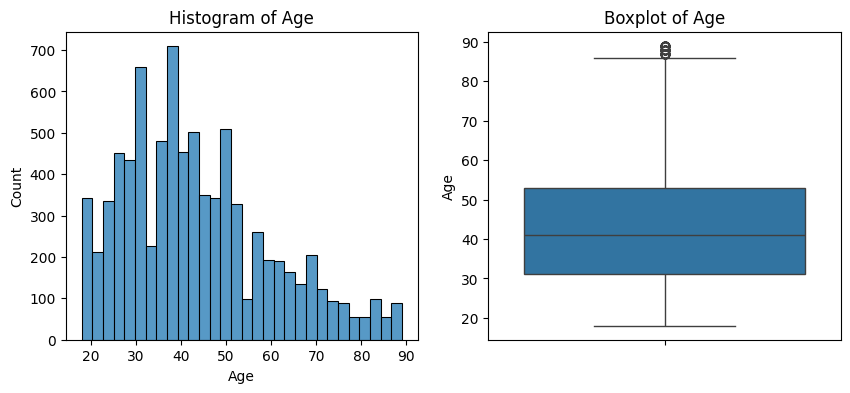

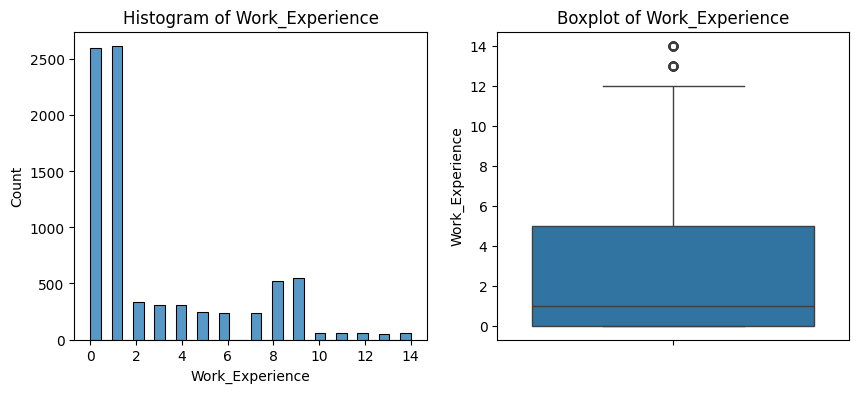

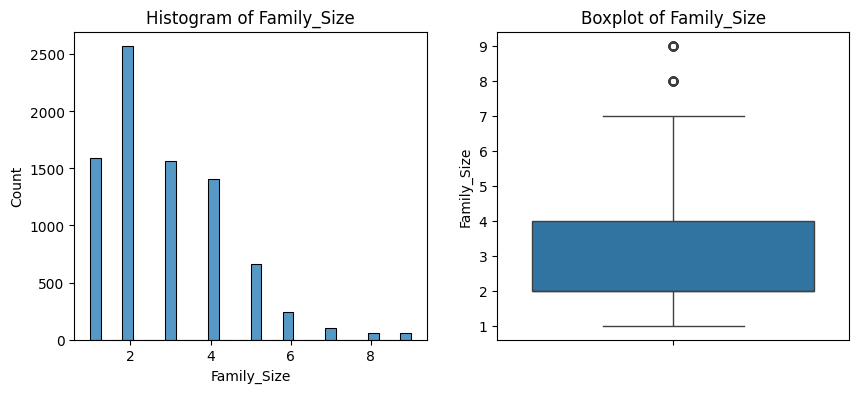

In [ ]:
# check outliers and distribution for each numerical columns

def check_outlier_dist_num(df, num):
  for col in num:
    plt.figure(figsize=(10,4)) # making the base figure

    plt.subplot(1, 2, 1)
    sns.histplot(df[col], bins=30) # histogram to see the distribution of each attributes within 30 pieces, because using 20 and 25 is not really good representing the distributiion in my opinion
    plt.title(f"Histogram of {col}") # title

    plt.subplot(1, 2, 2)
    sns.boxplot(df[col]) # boxplot of each attributes to see the potential outliers
    plt.title(f"Boxplot of {col}") # title

    plt.show()

check_outlier_dist_num(dataset[num_cols], num_cols)

As we can see here, between these 3 attributes here, based on the graph shown above, i can say that Age is the only attribute that almost normally distributed among the rest of them.  
Meanwhile the age boxplot is also the closest to the upper bound boxplot among the rest of them.

<ipython-input-18-6799a6af53c6>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')  # using countplot, because the attributes is categorical


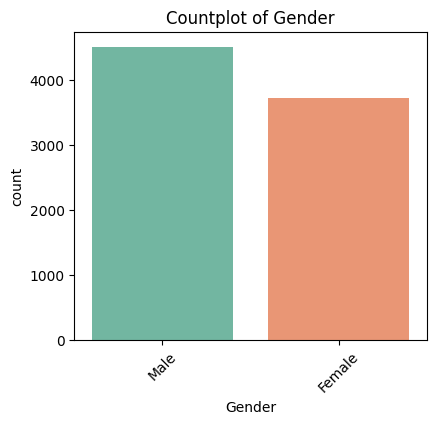

<ipython-input-18-6799a6af53c6>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')  # using countplot, because the attributes is categorical


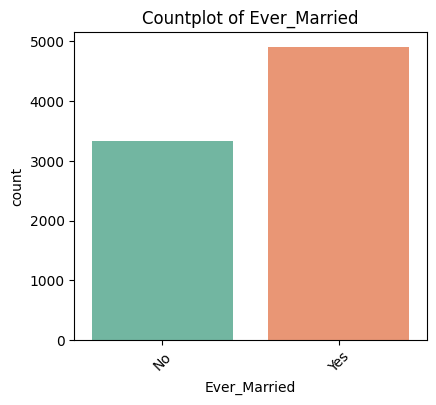

<ipython-input-18-6799a6af53c6>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')  # using countplot, because the attributes is categorical


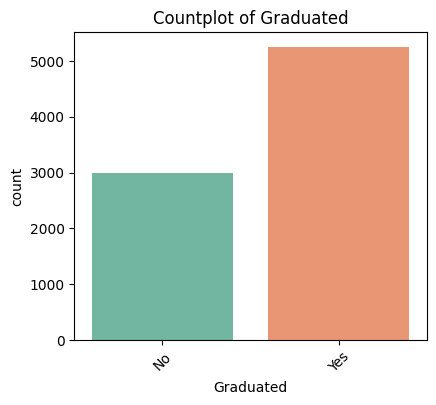

<ipython-input-18-6799a6af53c6>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')  # using countplot, because the attributes is categorical


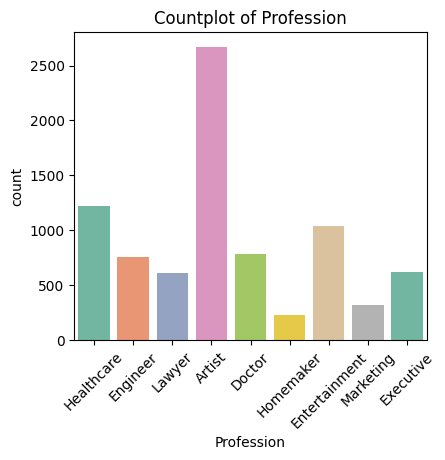

<ipython-input-18-6799a6af53c6>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')  # using countplot, because the attributes is categorical


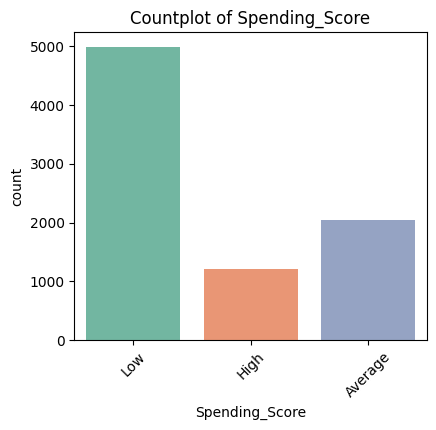

<ipython-input-18-6799a6af53c6>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')  # using countplot, because the attributes is categorical


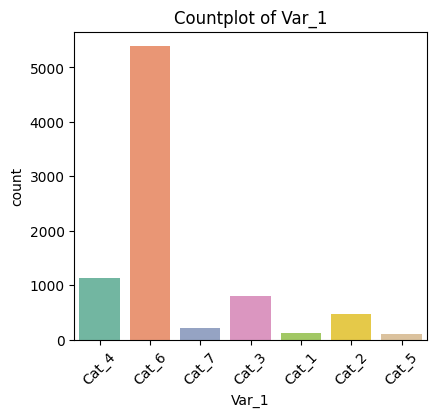

<ipython-input-18-6799a6af53c6>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')  # using countplot, because the attributes is categorical


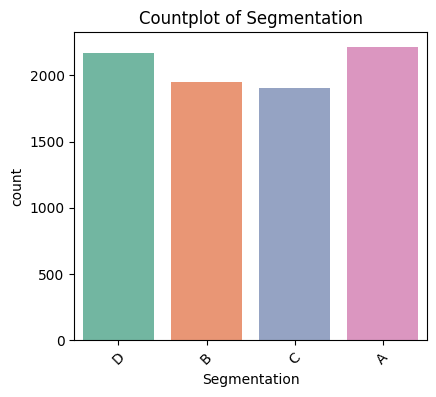

In [ ]:
# check outliers and distribution for each categorical columns

def check_outlier_dist_cat(df, cat):
  for col in cat:
    plt.figure(figsize=(10,4)) # making the base figure

    plt.subplot(1, 2, 1)
    sns.countplot(data=df, x=col, palette='Set2')  # using countplot, because the attributes is categorical
    plt.title(f'Countplot of {col}') # title
    plt.xticks(rotation=45) # rotate the label, because the profession part is a little bit un readable

    plt.show()

check_outlier_dist_cat(dataset[cat_cols], cat_cols)

The gender column is pretty good, because the comparison between them is pretty close, not too much.  
The Ever_Married column tells us that most of the customer's marital status is ever / already married  
The graduated column showing that most of the customer was already graduated.

The profession plot showing that the majority of the customer's profession is artist, healthcare, entertainment, doctor, and so on.  
Mosf of the customer's spending score is low, and then average, and lastly high, with pretty much differences.  
The Var_1 column showing that most of the category of each customer is highly dominated by cat_6.  
The segmentation column is the column that we want to predict, and the distribution among those 4 is pretty balanced


In [ ]:
# displaying unique values of each categorical columns or attributes
for i in cat_cols:
    print(dataset[i].value_counts(), "\n") # separate with enter

Gender
Male      4512
Female    3730
Name: count, dtype: int64 

Ever_Married
Yes    4910
No     3332
Name: count, dtype: int64 

Graduated
Yes    5251
No     2991
Name: count, dtype: int64 

Profession
Artist           2673
Healthcare       1220
Entertainment    1036
Doctor            785
Engineer          759
Executive         617
Lawyer            606
Marketing         322
Homemaker         224
Name: count, dtype: int64 

Spending_Score
Low        4990
Average    2038
High       1214
Name: count, dtype: int64 

Var_1
Cat_6    5386
Cat_4    1137
Cat_3     810
Cat_2     467
Cat_7     217
Cat_1     129
Cat_5      96
Name: count, dtype: int64 

Segmentation
A    2216
D    2169
B    1951
C    1906
Name: count, dtype: int64 



## Correlation Plot

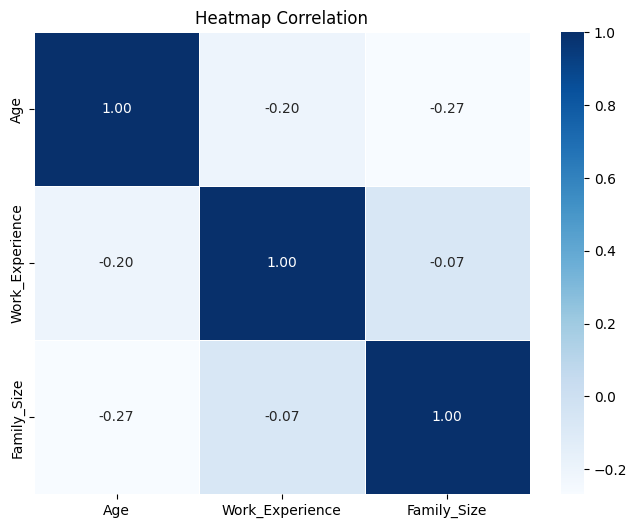

In [ ]:
# making correlation matrix, using only the numerical cols, because correlation plot only works with numerical data
corr_matrix = dataset[num_cols].corr()

# plotting the heatmap
plt.figure(figsize=(8, 6))  # Menyesuaikan ukuran heatmap
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5) # fmt for rounding 2 digits of number behind
plt.title("Heatmap Correlation") # plot title
plt.show()

As we can see, the correlation between the data is not nearly correlated at all. The correlation point between all the features showed by the heatmap is pretty low.

## Exploratory Data Analysis (EDA)

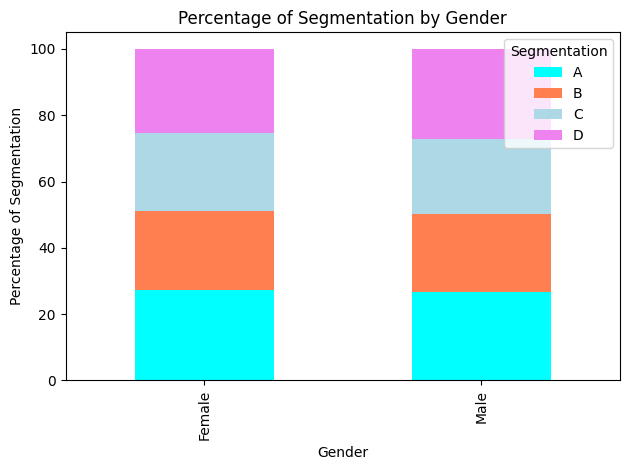

In [ ]:
# plotting the relations between gender and segmentation using stacked barplot
data_grouping = dataset.groupby(['Gender', 'Segmentation']).size().unstack()

# converting to percentage
data_grouping_percentage = data_grouping.div(data_grouping.sum(axis=1), axis=0) * 100
data_grouping_percentage.plot(kind='bar', stacked=True, color=['cyan', 'coral', 'lightblue', 'violet'])

plt.title('Percentage of Segmentation by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage of Segmentation')
plt.legend(title='Segmentation', loc='upper right')
plt.tight_layout()
plt.show()

# as we can see, the proportion between male and female is almost the same among these 4 segments
# the difference between each segment on both gender are so seamless
# Therefore we can say that gender didn't affecting the segmentation type, and we can exclude this during the training data

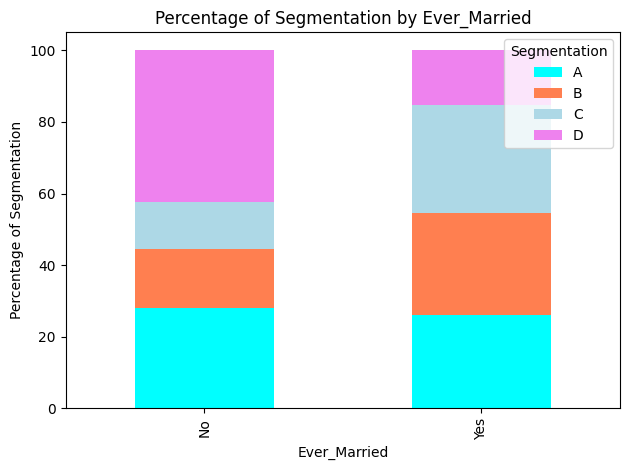

In [ ]:
# plotting the relations between ever married and segmentation using stacked barplot
data_grouping = dataset.groupby(['Ever_Married', 'Segmentation']).size().unstack()

# converting to percentage
data_grouping_percentage = data_grouping.div(data_grouping.sum(axis=1), axis=0) * 100
data_grouping_percentage.plot(kind='bar', stacked=True, color=['cyan', 'coral', 'lightblue', 'violet'])

plt.title('Percentage of Segmentation by Ever_Married')
plt.xlabel('Ever_Married')
plt.ylabel('Percentage of Segmentation')
plt.legend(title='Segmentation', loc='upper right')
plt.tight_layout()
plt.show()

# the graph below showing various ratio of each segment by marital status
# we can say that the customer in segment A is not really affected by the marital status
# but for customer in segment B and C are mostly has / ever marry
# meanwhile the customer in segment D are mostly came from the non-married person.
# therefore we can say that marital status / ever married is affecting the segmentation type

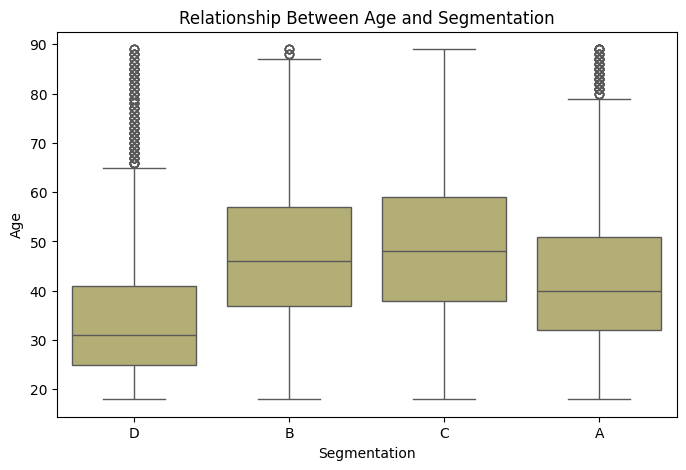

In [ ]:
# plotting the relations between age and segmentation using boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x = dataset['Segmentation'], y = dataset['Age'], color='darkkhaki')
plt.title('Relationship Between Age and Segmentation')
plt.xlabel('Segmentation')
plt.ylabel('Age')
plt.show()

# from this plot below, we can see that the age range from segment A is pretty average which are from 32 to 51 years old with a little outliers
# meanwhile the age range on segment B is a little bit goes up which are from 37 to 57 years old with a tiny amount of outliers
# the age range on segment C has slightly wider age range which goes from 38 to 59 years old without any outliers
# the age range on segment D is the youngest among these segment which goes from 25 to 41 years old only, but there are some outliers which is still normal / acceptable
# as we can see here, the age range is determining the segment of each customer

In [ ]:
# grouping data on each segment by age and count the quantiles
grouped_quantiles = dataset.groupby('Segmentation')['Age'].quantile([0.25, 0.50, 0.75])
grouped_quantiles
# in order to getting the information of each age range on each segments

Segmentation      
A             0.25    32.0
              0.50    40.0
              0.75    51.0
B             0.25    37.0
              0.50    46.0
              0.75    57.0
C             0.25    38.0
              0.50    48.0
              0.75    59.0
D             0.25    25.0
              0.50    31.0
              0.75    41.0
Name: Age, dtype: float64

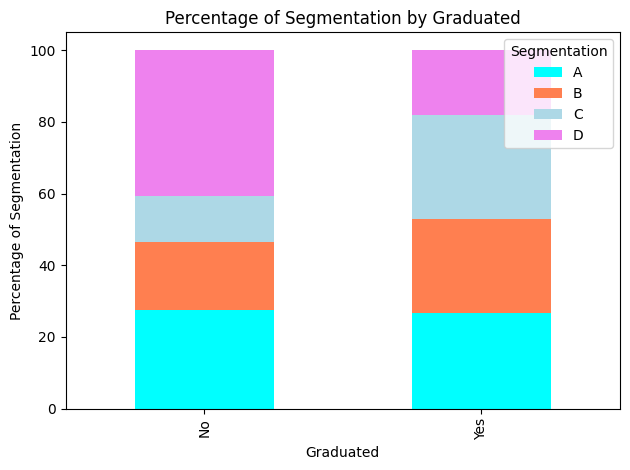

In [ ]:
# plotting the relations between graduated and segmentation using stacked barplot
data_grouping = dataset.groupby(['Graduated', 'Segmentation']).size().unstack()

# converting to percentage
data_grouping_percentage = data_grouping.div(data_grouping.sum(axis=1), axis=0) * 100
data_grouping_percentage.plot(kind='bar', stacked=True, color=['cyan', 'coral', 'lightblue', 'violet'])

plt.title('Percentage of Segmentation by Graduated')
plt.xlabel('Graduated')
plt.ylabel('Percentage of Segmentation')
plt.legend(title='Segmentation', loc='upper right')
plt.tight_layout()
plt.show()

# the plot below tells us about what type of segment of each customer based on the graduation status
# we can say that the customer in segment A is not really affected by the graduation status
# but for customer in segment B and C are mostly came from the graduated person
# meanwhile the customer in segment D are mostly came from the non-graduated person.
# therefore we can say that graduation status is affecting the segmentation type

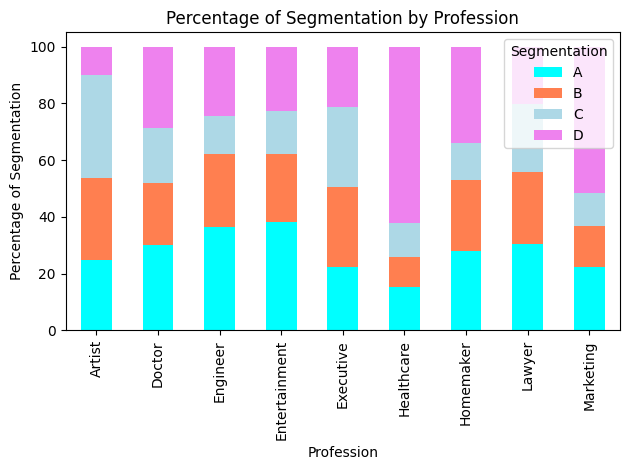

In [ ]:
# plotting the relations between profession and segmentation using stacked barplot
data_grouping = dataset.groupby(['Profession', 'Segmentation']).size().unstack()

# converting to percentage
data_grouping_percentage = data_grouping.div(data_grouping.sum(axis=1), axis=0) * 100
data_grouping_percentage.plot(kind='bar', stacked=True, color=['cyan', 'coral', 'lightblue', 'violet'])

plt.title('Percentage of Segmentation by Profession')
plt.xlabel('Profession')
plt.ylabel('Percentage of Segmentation')
plt.legend(title='Segmentation', loc='upper right')
plt.tight_layout()
plt.show()

# the plot below tells us about what type of segment of each customer based on their work profession
# each profession have different proportion for each customer segmentation
# therefore we can conclude that the profession affecting each customer's segmentation

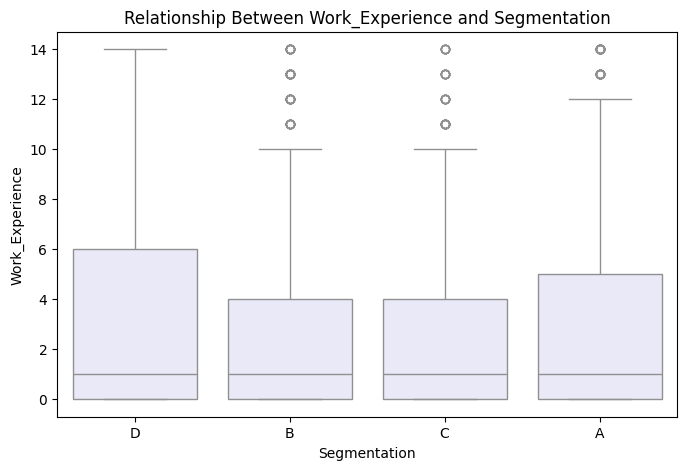

In [ ]:
# plotting the relations between Work_Experience and segmentation using boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x = dataset['Segmentation'], y = dataset['Work_Experience'], color='lavender')
plt.title('Relationship Between Work_Experience and Segmentation')
plt.xlabel('Segmentation')
plt.ylabel('Work_Experience')
plt.show()

# from the plot below, we can see that the work experience range in segment A is around 0 to 5 years with a few outliers
# meanwhile the work experience range in segment B and C is equally goes around 0 to 4 with some outliers
# and the last segment with work experience from 0 to years with no outliers detected
# all the outliers detected is still acceptable / normal
# i think the duration of work experience is slightly affecting the segmentation for each customer
# like if the work experience is below 5 years are most likely to be segmented on B or C, otherwise

In [ ]:
# grouping data on each segment by work experience and count the quantiles
grouped_quantiles = dataset.groupby('Segmentation')['Work_Experience'].quantile([0.25, 0.50, 0.75])
grouped_quantiles
# in order to getting the information of each Work_Experience range on each segments

Segmentation      
A             0.25    0.0
              0.50    1.0
              0.75    5.0
B             0.25    0.0
              0.50    1.0
              0.75    4.0
C             0.25    0.0
              0.50    1.0
              0.75    4.0
D             0.25    0.0
              0.50    1.0
              0.75    6.0
Name: Work_Experience, dtype: float64

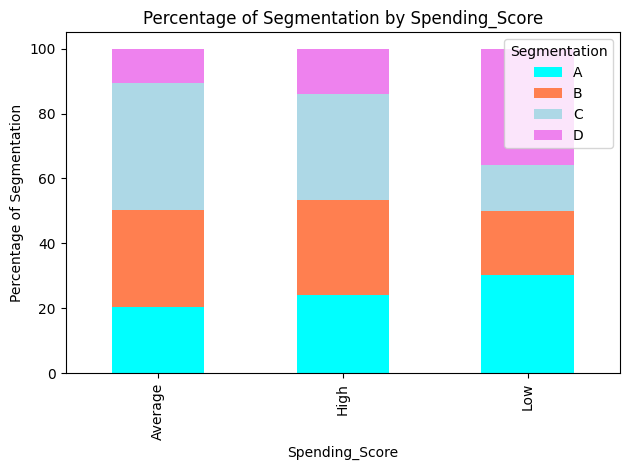

In [ ]:
# plotting the relations between spending score and segmentation using stacked barplot
data_grouping = dataset.groupby(['Spending_Score', 'Segmentation']).size().unstack()

# converting to percentage
data_grouping_percentage = data_grouping.div(data_grouping.sum(axis=1), axis=0) * 100
data_grouping_percentage.plot(kind='bar', stacked=True, color=['cyan', 'coral', 'lightblue', 'violet'])

plt.title('Percentage of Segmentation by Spending_Score')
plt.xlabel('Spending_Score')
plt.ylabel('Percentage of Segmentation')
plt.legend(title='Segmentation', loc='upper right')
plt.tight_layout()
plt.show()

# the plot below tells us about each customer segments by theri spending score
# as we can see the proportion of each segmentation on both average and high spending score is pretty similar
# but the proporion of each segmentation on customer with low spending score is pretty different
# therefore we can conclude that spending score is pretty much affecting the segmentation

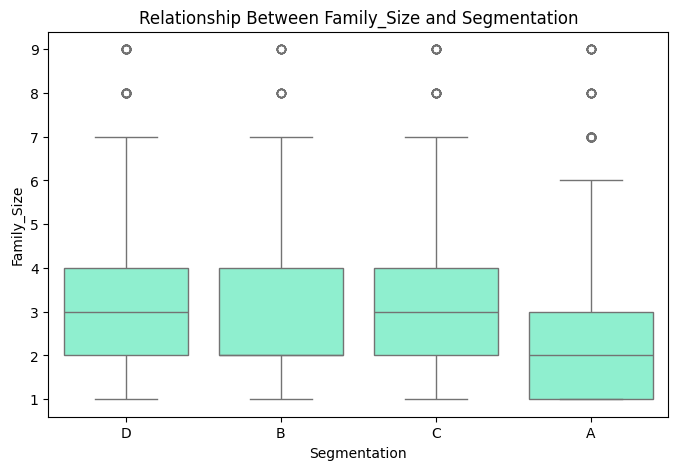

In [ ]:
# plotting the relations between Family_Size and segmentation using boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x = dataset['Segmentation'], y = dataset['Family_Size'], color='aquamarine')
plt.title('Relationship Between Family_Size and Segmentation')
plt.xlabel('Segmentation')
plt.ylabel('Family_Size')
plt.show()

# from the plot below, we can see that the distribution of family size are the same in all segments except segment A
# segment A's range family size is a little bit lower than those 3 segments
# but i think family size affects the segmentation categories


In [ ]:
# grouping data on each segment by family size and count the quantiles
grouped_quantiles = dataset.groupby('Segmentation')['Family_Size'].quantile([0.25, 0.50, 0.75])
grouped_quantiles
# in order to getting the information of each Family_Size range on each segments

Segmentation      
A             0.25    1.0
              0.50    2.0
              0.75    3.0
B             0.25    2.0
              0.50    2.0
              0.75    4.0
C             0.25    2.0
              0.50    3.0
              0.75    4.0
D             0.25    2.0
              0.50    3.0
              0.75    4.0
Name: Family_Size, dtype: float64

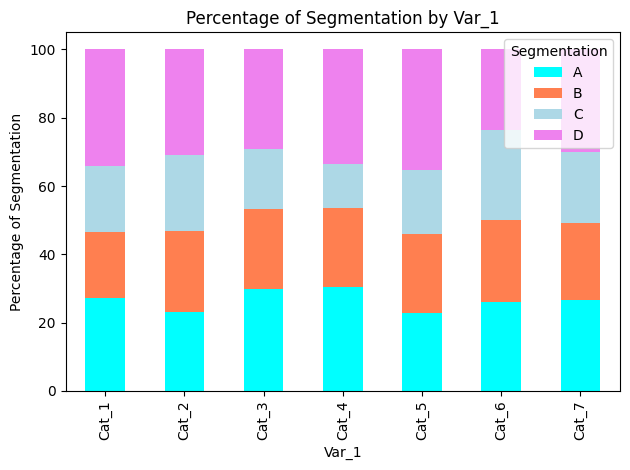

In [ ]:
# plotting the relations between Var_1 and segmentation using stacked barplot
data_grouping = dataset.groupby(['Var_1', 'Segmentation']).size().unstack()

# converting to percentage
data_grouping_percentage = data_grouping.div(data_grouping.sum(axis=1), axis=0) * 100
data_grouping_percentage.plot(kind='bar', stacked=True, color=['cyan', 'coral', 'lightblue', 'violet'])

plt.title('Percentage of Segmentation by Var_1')
plt.xlabel('Var_1')
plt.ylabel('Percentage of Segmentation')
plt.legend(title='Segmentation', loc='upper right')
plt.tight_layout()
plt.show()

# the plot below tells us about what type of segment of each customer based on Var_1
# each attribute in Var_1 have different proportion for each customer segmentation, but the difference are not really significant
# but i'll assume that the Var_1 is affecting each customer's segmentation because it's an anonymised category for each customer

## Data Preprocessing

### Outlier Handling
Because the outlier on age, work experience and family size columns are still pretty acceptable, therefore i won't do nothing to handle this.


### Selecting Features

In [ ]:
# because i won't be using Gender to predict the segmentation of each customer, therefore i'll delete the column
dataset.drop(columns=["Gender"], inplace=True) # inplace = True, so the dataset is changed straightaway
dataset.head()

,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
2,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
3,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
4,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C


## Encoding
Because in machine learning training and modelling only allow to accept numerical data, therefore we should encode the categorical to numerical data types. But as we can see from the dataset, the existing categorical data consist of nominal and ordinal data.  
Therefore we must treat it differently.

In [ ]:
# specify the nominal columns
nominal_columns = ["Ever_Married", "Graduated", "Profession", "Var_1"]
print(nominal_columns)

['Ever_Married', 'Graduated', 'Profession', 'Var_1']


In [ ]:
# specify the ordinal column
ordinal_columns = ["Spending_Score"]
print(ordinal_columns)

['Spending_Score']


In [ ]:
# specify the label column
label_column = ["Segmentation"]
print(label_column)

['Segmentation']


In [ ]:
# one hot encoding for the nominal columns
one_hot_encoding = OneHotEncoder(sparse_output=False)
nom_cols_encoded = one_hot_encoding.fit_transform(dataset[nominal_columns])
encoded_nom_dataset = pd.DataFrame(nom_cols_encoded, columns=one_hot_encoding.get_feature_names_out(nominal_columns))
encoded_nom_dataset.head() # check the encoding results

,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# ordinal encoding for ordinal column
ordinal_ordering = [["Low", "Average", "High"]]
ordinal_encoding = OrdinalEncoder(categories=ordinal_ordering)
ord_cols_encoded = ordinal_encoding.fit_transform(dataset[ordinal_columns])
encoded_ord_dataset = pd.DataFrame(ord_cols_encoded, columns=ordinal_encoding.get_feature_names_out(ordinal_columns))
encoded_ord_dataset.head()

,Spending_Score
0,0.0
1,0.0
2,2.0
3,1.0
4,0.0


In [ ]:
# label encoding for the predicted label
label_encoding = LabelEncoder()
dataset["Segmentation"] = label_encoding.fit_transform(dataset["Segmentation"])
encoded_label_dataset = dataset[["Segmentation"]] # dataframe for the encoded labels

In [ ]:
# merge these 3 encoded columns
encoded_dataset = pd.concat([encoded_nom_dataset, encoded_ord_dataset, encoded_label_dataset], axis=1)
encoded_dataset.head()

,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,...,Profession_Marketing,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7,Spending_Score,Segmentation
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3
1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1
3,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2


In [ ]:
# combine the encoded columns into the dataframe, and delete the unencoded nominal columns
final_dataset = pd.concat([dataset.drop(columns=nominal_columns + ordinal_columns + label_column), encoded_dataset.astype("int")], axis=1)
final_dataset.head()

,Age,Work_Experience,Family_Size,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,Profession_Artist,Profession_Doctor,Profession_Engineer,...,Profession_Marketing,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7,Spending_Score,Segmentation
0,22,1.0,4.0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,3
1,67,1.0,1.0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
2,67,0.0,2.0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,2,1
3,56,0.0,2.0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,2
4,32,1.0,3.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,2


In [ ]:
dataset

,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,3
1,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,1
2,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,1
3,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,2
4,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,2
...,...,...,...,...,...,...,...,...,...
8237,No,19,No,Healthcare,0.0,Low,3.0,Cat_6,0
8238,No,35,Yes,Entertainment,1.0,Low,2.0,Cat_6,3
8239,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,1
8240,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,0


## Splitting to Train and Test Data


In [ ]:
x = final_dataset[final_dataset.columns.drop(["Segmentation"])]  # select the dataset excluding the predicted value which is Segmentation
y = final_dataset["Segmentation"] # as predicted value
x.head()

,Age,Work_Experience,Family_Size,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,Profession_Artist,Profession_Doctor,Profession_Engineer,...,Profession_Lawyer,Profession_Marketing,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7,Spending_Score
0,22,1.0,4.0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,67,1.0,1.0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,67,0.0,2.0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,2
3,56,0.0,2.0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
4,32,1.0,3.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=128)
print(x_train.shape, x_test.shape)  # as we can see, here the train and test data are well separated
# the train data consist of 6593 rows and 24 cols, meanwhile the test data consist of 1649 rows and 24 cols

(6593, 24) (1649, 24)


## Scaling
changing the scale or range of numerical features to make it more proportional one to another

In [ ]:
# here i'll use robust scaler, because it's more robust to outlier.
# i didn't handle the outliers in my data
# therefore there are still some outliers in my data. but the outliers are still tollerated.

# the features that has outliers are age and creditscore
outliers_cols = ["Age", "Work_Experience", "Family_Size"]

# using robust scaler function
robust_scaler = RobustScaler()
x_train[outliers_cols] = robust_scaler.fit_transform(x_train[outliers_cols])  # fitting the scaler into the columns with outlier, remember fitting is only allowed during training
x_test[outliers_cols] = robust_scaler.transform(x_test[outliers_cols])

## Modelling : 2702223084 (Even Number)

### Random Forest

In [ ]:
# training model
model = RandomForestClassifier()
model = model.fit(X = x_train, y = y_train)

In [ ]:
# predicting label
y_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)
r2(y_train,y_train_pred)
# the result 0.82... means that this model is quite good in explaining the variability
# or we can say that it's pretty much accurate, because it's not so far away from 1.0

0.8207987780026342

### Evaluate Model
Decision tree is quite good, as we can see from the r2 aroung 0.82 is still okay for me, i'm still considering if it's classified as "high" or not but overall it's pretty good eventhough it's not the best model.

In [ ]:
# this matrix showing the true negative, false positive, false negative, and true positive
print("Confusion Matrix:")  # first step in evaluate model
print(confusion_matrix(y_test, y_pred)) # second step in evaluate model

print("\nClassification Report:")  # showing the classification report from sklearn metric
print(classification_report(y_test, y_pred))

# as we can see here, this model is not good / i can say it's pretty bad in modelling the customer segmentation
# the precision, recall, and f1-score is pretty low, all of them below 50 %
# from those 4 segments, the best among them is the segment D, but it still not good though.
# therefore the results is not satisfying for me

print("Accuracy:", accuracy_score(y_test, y_pred)) # the accuracy of this model is pretty bad, around 37 %

Confusion Matrix:
[[167 121  64  99]
 [ 99 118 105  62]
 [ 72 113 143  64]
 [119  66  43 194]]

Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.37      0.37       451
           1       0.28      0.31      0.29       384
           2       0.40      0.36      0.38       392
           3       0.46      0.46      0.46       422

    accuracy                           0.38      1649
   macro avg       0.38      0.38      0.38      1649
weighted avg       0.38      0.38      0.38      1649

Accuracy: 0.37719830200121285


### Fine Tuning using GridSearchCV
Because the results are too bad, i decided to do fine tuning to see if the results are getting better or not

In [ ]:
# define the parameters for fine tuning
parameters = {
    'n_estimators': [50, 75, 100],      # number of trees
    'max_depth': [8, 14, 20],           # maximum depth
    'min_samples_split': [2, 4, 6],     # minimum samples for splitting
    'min_samples_leaf': [1, 2, 4],      # minimum samples in leaf node
    'bootstrap': [True, False]          # use bootstrap / no
}

rand_for_class = RandomForestClassifier()
grid_search_cv = GridSearchCV(estimator=rand_for_class, param_grid=parameters,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Grid searching inside the training data
grid_search_cv.fit(x_train, y_train)

print(f"Best Hyperparameters: {grid_search_cv.best_params_}")
print(f"Best Accuracy: {grid_search_cv.best_score_}") # the accuracy is around 47 which is going up and better than before

Fitting 5 folds for each of 162 candidates, totalling 810 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Hyperparameters: {'bootstrap': True, 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 50}
Best Accuracy: 0.47140382020222704


In [ ]:
# finding the best model
best_predict_model = grid_search_cv.best_estimator_
y_pred = best_predict_model.predict(x_test)

# showing the accuracy
print("Accuracy:", accuracy_score(y_test, y_pred)) # the accuracy after fine tuning is better around 45 %
print(classification_report(y_test, y_pred)) # the accuracy is increasing from .37 to .45, which is better, but still not that good

Accuracy: 0.45906610066707093
              precision    recall  f1-score   support

           0       0.43      0.47      0.45       451
           1       0.33      0.27      0.30       384
           2       0.51      0.51      0.51       392
           3       0.54      0.57      0.56       422

    accuracy                           0.46      1649
   macro avg       0.45      0.46      0.45      1649
weighted avg       0.45      0.46      0.46      1649



### XGBoost Algorithm

In [ ]:
# training model
model = XGBClassifier(random_state=128)
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
# predicting label
y_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)
r2(y_train,y_train_pred)
# the result 0.22... means that this model is really bad in explaining the variability
# or we can say that it's not really accurate, because it's so far away from 1.0 and nearly zero

0.227382118801576

### Evaluate Model
Decision tree is pretty bad, as we can see from the r2 aroung 0.22 is not really okay for me.

> Add blockquote



In [ ]:
# this matrix showing the true negative, false positive, false negative, and true positive
print("Confusion Matrix:")  # first step in evaluate model
print(confusion_matrix(y_test, y_pred)) # second step in evaluate model

print("\nClassification Report:")  # showing the classification report from sklearn metric
print(classification_report(y_test, y_pred))

# as we can see here, this model is not really good also in modelling the customer segmentation
# the precision, recall, and f1-score is pretty low, aaround 30 to 50 something, a litle higher than random forest
# from those 4 segments, the best among them is still the segment D, but it still average, like 50 %
# therefore the results have not satisfy my expectation

print("Accuracy:", accuracy_score(y_test, y_pred)) # the accuracy of this model is slightly better, around 41 %

Confusion Matrix:
[[185 100  51 115]
 [ 96 117 116  55]
 [ 71 107 161  53]
 [114  58  31 219]]

Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.41      0.40       451
           1       0.31      0.30      0.31       384
           2       0.45      0.41      0.43       392
           3       0.50      0.52      0.51       422

    accuracy                           0.41      1649
   macro avg       0.41      0.41      0.41      1649
weighted avg       0.41      0.41      0.41      1649

Accuracy: 0.41358399029714976


### Fine Tuning using GridSearchCV
Because the results are too bad, i decided to do fine tuning to see if the results are getting better or not

In [ ]:
# define the parameters for fine tuning
parameters = {
    'max_depth': [3, 4],                 # maximum depth
    'learning_rate': [0.05, 0.15],      # step size for updating weights
    'n_estimators': [50, 100],         # number of trees
    'subsample': [0.6, 0.8],           # fraction of the training data
    'colsample_bytree': [0.7, 0.9],    # fraction of features sampled randomly for each tree
    'gamma': [0, 0.1],                 # minimum loss reduction
    'min_child_weight': [1, 2]           # minimum child weight
}

xgb_classifier = XGBClassifier(random_state=128, use_label_encoder=False, eval_metric='logloss')
grid_search_cv = GridSearchCV(estimator=xgb_classifier, param_grid=parameters,
                               cv=5, n_jobs=-1,
                               verbose=2, scoring='accuracy')

# Grid searching inside the training data
grid_search_cv.fit(x_train, y_train)

print(f"Best Hyperparameters: {grid_search_cv.best_params_}")
print(f"Best Accuracy: {grid_search_cv.best_score_}") # the accuracy is around 47 percent which is better than before fine tuning

Fitting 5 folds for each of 128 candidates, totalling 640 fits
Best Hyperparameters: {'colsample_bytree': 0.9, 'gamma': 0, 'learning_rate': 0.15, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 0.8}
Best Accuracy: 0.47383116606708764


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:42:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
# finding the best model
best_predict_model = grid_search_cv.best_estimator_
y_pred = best_predict_model.predict(x_test)

# showing the accuracy
print("Accuracy:", accuracy_score(y_test, y_pred)) # the accuracy after fine tuning is adding around 4 percent to 45 %
print(classification_report(y_test, y_pred)) # the accuracy is increasing from .41 to .45, which is better, but still not that good

Accuracy: 0.45118253486961796
              precision    recall  f1-score   support

           0       0.40      0.45      0.43       451
           1       0.35      0.28      0.31       384
           2       0.50      0.49      0.50       392
           3       0.53      0.57      0.55       422

    accuracy                           0.45      1649
   macro avg       0.45      0.45      0.45      1649
weighted avg       0.45      0.45      0.45      1649



## Comparison between Random Forest and XGBoost Algorithm
basicly, both of this model is not really good for predicting this dataset. The difference between them is just slightly better one to another. Based on the classifcation report, we can see that XGBoost has a higher percentage accuracy in the beginning than random forest, even though after fine tuning the results are the same which are 45 %, but overall i think XGBoost is slightly having more advantages than random forest classifier in this case.

# Bonus

##3. XGBoost is a boosting algorithm based on tree-based models. It has a mechanism to display 3 types of feature importance: (1) gain, (2) weight, & (3) coverage. Explain each of them (max. 3 points)

Gain representing how much impact given from each feature to the model, calculated by evaluating its contribution among all the trees in the model. A higher Gain value for a feature indicates that it plays more significant role in predictions making compared to other features. Gain measures how much a feature improves the model's accuracy when it is used to split a branch. Lastly gain is usually used to prioritizing some features for feature selection.

Weight indicates how often the feature occur in the model trees which shown by a percentage. For example, if a feature appears in 2 splits of tree1, 1 split of tree2, and 3 splits of tree3, its weight would be calculated as 2 + 1 + 3 = 6 2 1 + 3 = 6. The frequency of the feature is the percentage of this weight relative to the total weight of all features in the model.

Coverage showing the number of observation that are connected to a particular feature. Or we can say that it measures the relative quantity of observations concerned by a feature.



##4. There is a joke among data scientists, "when in doubt, use XGBoost" - Owen Zhang. State the reasons and in what scenarios will XGBoost perform badly! (max. 3 points)

Basically he said that because, USUALLY among all the machine learning models,  XGBoost has the best and hightest result among all the other models.  
This could happen because XGBoost is offering a pretty high performance and capability and also fast and efficient modelling such as handling many types of datasets in large size and avoiding overfitting with some regularization, parallelization, and tree pruning.  
It also offers flexibility and scalability like tuning options for some tasks such as regression, classification, etc, and it can scale efficiently based on the data size.  
Based on these ability XGBoost has, therefore many people will use this model, because it has a quite high accuracy and saves more time (more efficient)    
  

  
  XGBoost perform badly in :      
When handling a small dataset, because as i've mentioned above, this model has advantage handling a dataset in LARGE size, so if the dataset is too small, the results might be overfitting because the lack of training data.  
It also not good for dealing data with time series, because this model doesn't undersand the ordering, meanwhile in time series, ordering is important. Therefore it expect to handle a data in tabular form so the patterns won't be changed.  
Lastly, it's less interpretable than any other simpler models such as linear regression, decision tree, etc. Because the prediction comes from the combination of many trees, which makes it harder to understand and explain.
This becomes a problem because in real world, we must know how the things work, if we don't understand it, the model might be bias or the predictions might not be really accurate








##5. Tell me a joke related to ensembling or tree-based algorithms (max. 1 point)

Do you have any solutions to fix the misunderstanding between us? Why don't we be like ensemble learning, we combine all the things so the things between us might work better?
